출처 : Tensorflow 튜토리얼

In [20]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [21]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indicse in enumerate(sequences):
        results[i, word_indicse] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension = NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension = NUM_WORDS)

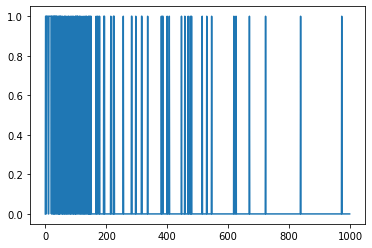

In [22]:
plt.plot(train_data[0])

In [23]:
baseline_model = keras.Sequential([
                                   keras.layers.Dense(16, activation = 'relu', input_shape = (NUM_WORDS, )),
                                   keras.layers.Dense(16, activation = 'relu'),
                                   keras.layers.Dense(1, activation = 'sigmoid')
])

baseline_model.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                16016     
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [24]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_data = (test_data, test_labels), verbose = 2)

Epoch 1/20
49/49 - 1s - loss: 0.5655 - accuracy: 0.7186 - binary_crossentropy: 0.5655 - val_loss: 0.4216 - val_accuracy: 0.8237 - val_binary_crossentropy: 0.4216 - 1s/epoch - 27ms/step
Epoch 2/20
49/49 - 1s - loss: 0.3653 - accuracy: 0.8483 - binary_crossentropy: 0.3653 - val_loss: 0.3438 - val_accuracy: 0.8535 - val_binary_crossentropy: 0.3438 - 613ms/epoch - 13ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3215 - accuracy: 0.8672 - binary_crossentropy: 0.3215 - val_loss: 0.3331 - val_accuracy: 0.8581 - val_binary_crossentropy: 0.3331 - 408ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3085 - accuracy: 0.8733 - binary_crossentropy: 0.3085 - val_loss: 0.3297 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3297 - 420ms/epoch - 9ms/step
Epoch 5/20
49/49 - 1s - loss: 0.3030 - accuracy: 0.8756 - binary_crossentropy: 0.3030 - val_loss: 0.3281 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3281 - 631ms/epoch - 13ms/step
Epoch 6/20
49/49 - 1s - loss: 0.3005 - accuracy: 0.8756 - binary_

In [25]:
smaller_model = keras.Sequential([
                                  keras.layers.Dense(4, activation = 'relu', input_shape = (NUM_WORDS, )),
                                  keras.layers.Dense(4, activation = 'relu'),
                                  keras.layers.Dense(1, activation = 'sigmoid')
])

smaller_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy', 
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 4004      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [26]:
smaller_history = smaller_model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_data = (test_data, test_labels), verbose = 2)

Epoch 1/20
49/49 - 1s - loss: 0.6933 - accuracy: 0.5534 - binary_crossentropy: 0.6933 - val_loss: 0.6809 - val_accuracy: 0.6088 - val_binary_crossentropy: 0.6809 - 1s/epoch - 21ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6609 - accuracy: 0.6292 - binary_crossentropy: 0.6609 - val_loss: 0.6356 - val_accuracy: 0.6868 - val_binary_crossentropy: 0.6356 - 311ms/epoch - 6ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5899 - accuracy: 0.7467 - binary_crossentropy: 0.5899 - val_loss: 0.5526 - val_accuracy: 0.7802 - val_binary_crossentropy: 0.5526 - 319ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.5267 - accuracy: 0.8115 - binary_crossentropy: 0.5267 - val_loss: 0.5157 - val_accuracy: 0.8089 - val_binary_crossentropy: 0.5157 - 363ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4938 - accuracy: 0.8365 - binary_crossentropy: 0.4938 - val_loss: 0.4911 - val_accuracy: 0.8399 - val_binary_crossentropy: 0.4911 - 359ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.4712 - accuracy: 0.8500 - binary_cr

In [27]:
bigger_model = keras.Sequential([
                                  keras.layers.Dense(512, activation = 'relu', input_shape = (NUM_WORDS, )),
                                  keras.layers.Dense(512, activation = 'relu'),
                                  keras.layers.Dense(1, activation = 'sigmoid')
])

bigger_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy', 
                      metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               512512    
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dense_23 (Dense)            (None, 1)                 513       
                                                                 
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [28]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.4176 - accuracy: 0.8115 - binary_crossentropy: 0.4176 - val_loss: 0.3586 - val_accuracy: 0.8464 - val_binary_crossentropy: 0.3586 - 3s/epoch - 68ms/step
Epoch 2/20
49/49 - 3s - loss: 0.2944 - accuracy: 0.8781 - binary_crossentropy: 0.2944 - val_loss: 0.3267 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3267 - 3s/epoch - 53ms/step
Epoch 3/20
49/49 - 3s - loss: 0.2330 - accuracy: 0.9068 - binary_crossentropy: 0.2330 - val_loss: 0.3469 - val_accuracy: 0.8504 - val_binary_crossentropy: 0.3469 - 3s/epoch - 53ms/step
Epoch 4/20
49/49 - 3s - loss: 0.1212 - accuracy: 0.9601 - binary_crossentropy: 0.1212 - val_loss: 0.4451 - val_accuracy: 0.8383 - val_binary_crossentropy: 0.4451 - 3s/epoch - 54ms/step
Epoch 5/20
49/49 - 3s - loss: 0.0343 - accuracy: 0.9931 - binary_crossentropy: 0.0343 - val_loss: 0.5055 - val_accuracy: 0.8467 - val_binary_crossentropy: 0.5055 - 3s/epoch - 53ms/step
Epoch 6/20
49/49 - 3s - loss: 0.0067 - accuracy: 0.9996 - binary_crossentro

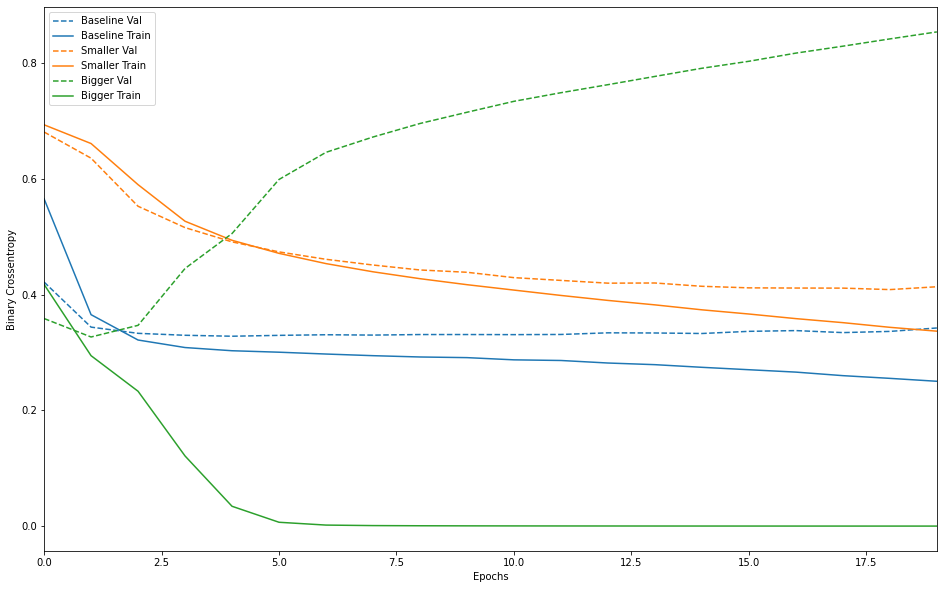

In [29]:
def plot_history(histories, key = 'binary_crossentropy'):
    plt.figure(figsize = (16, 10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label = name.title() + ' Val')
        plt.plot(history.epoch, history.history[key], color = val[0].get_color(),
                 label = name.title() + ' Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)
])

In [30]:
l2_model = keras.Sequential([
                                   keras.layers.Dense(16, kernel_regularizer = keras.regularizers.l2(0.001),
                                                      activation = 'relu', input_shape = (NUM_WORDS, )),
                                   keras.layers.Dense(16, kernel_regularizer = keras.regularizers.l2(0.001), 
                                                      activation = 'relu'),
                                   keras.layers.Dense(1, activation = 'sigmoid')
])

l2_model.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5975 - accuracy: 0.7278 - binary_crossentropy: 0.5533 - val_loss: 0.4655 - val_accuracy: 0.8214 - val_binary_crossentropy: 0.4241 - 1s/epoch - 27ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4082 - accuracy: 0.8472 - binary_crossentropy: 0.3685 - val_loss: 0.3867 - val_accuracy: 0.8528 - val_binary_crossentropy: 0.3485 - 341ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3620 - accuracy: 0.8658 - binary_crossentropy: 0.3249 - val_loss: 0.3683 - val_accuracy: 0.8602 - val_binary_crossentropy: 0.3323 - 340ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3463 - accuracy: 0.8716 - binary_crossentropy: 0.3111 - val_loss: 0.3656 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.3314 - 380ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3391 - accuracy: 0.8740 - binary_crossentropy: 0.3055 - val_loss: 0.3614 - val_accuracy: 0.8609 - val_binary_crossentropy: 0.3286 - 375ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3354 - accuracy: 0.8747 - binary_cr

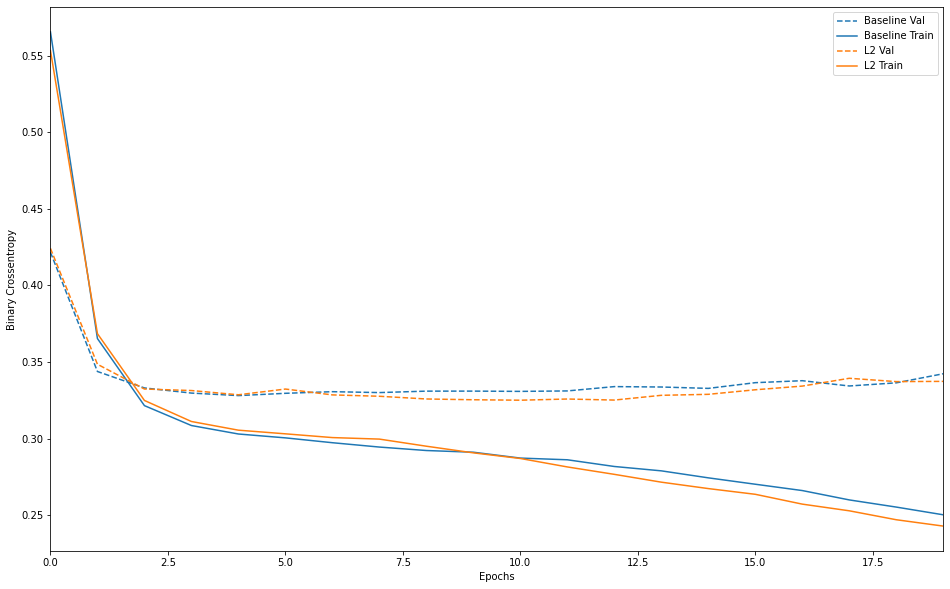

In [31]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [32]:
dpt_model = keras.Sequential([
                                   keras.layers.Dense(16, activation = 'relu', input_shape = (NUM_WORDS, )),
                                   keras.layers.Dropout(0.5),
                                   keras.layers.Dense(16, activation = 'relu'),
                                   keras.layers.Dropout(0.5),
                                   keras.layers.Dense(1, activation = 'sigmoid')
])

dpt_model.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6830 - accuracy: 0.5590 - binary_crossentropy: 0.6830 - val_loss: 0.6288 - val_accuracy: 0.7421 - val_binary_crossentropy: 0.6288 - 1s/epoch - 23ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5998 - accuracy: 0.6846 - binary_crossentropy: 0.5998 - val_loss: 0.4927 - val_accuracy: 0.8142 - val_binary_crossentropy: 0.4927 - 396ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5159 - accuracy: 0.7654 - binary_crossentropy: 0.5159 - val_loss: 0.4187 - val_accuracy: 0.8426 - val_binary_crossentropy: 0.4187 - 398ms/epoch - 8ms/step
Epoch 4/20
49/49 - 1s - loss: 0.4633 - accuracy: 0.8073 - binary_crossentropy: 0.4633 - val_loss: 0.3812 - val_accuracy: 0.8501 - val_binary_crossentropy: 0.3812 - 734ms/epoch - 15ms/step
Epoch 5/20
49/49 - 1s - loss: 0.4289 - accuracy: 0.8308 - binary_crossentropy: 0.4289 - val_loss: 0.3593 - val_accuracy: 0.8552 - val_binary_crossentropy: 0.3593 - 528ms/epoch - 11ms/step
Epoch 6/20
49/49 - 0s - loss: 0.4059 - accuracy: 0.8411 - binary_

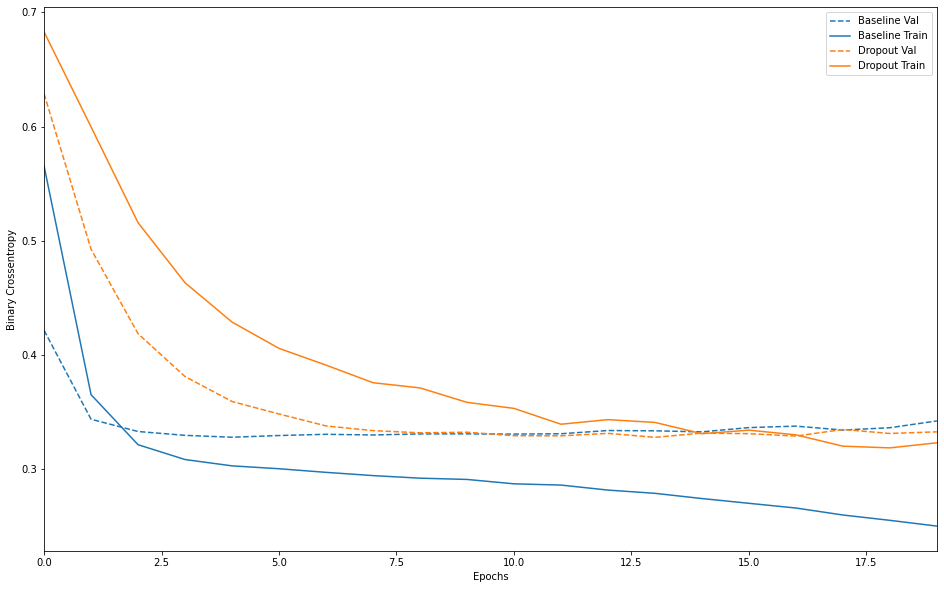

In [33]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])